# UAP Self Organizing Maps

SOM merupakan model JST yang melatih data dengan pendekatan unsupervised learning. Pada praktikum, penentuan jumlah cluster didasarkan pada nilai  Silhouette untuk mengukur homogenitas cluster. Pada UAP kali ini, implementasikan penentuan jumlah cluster yang optimal dengan elbow method.

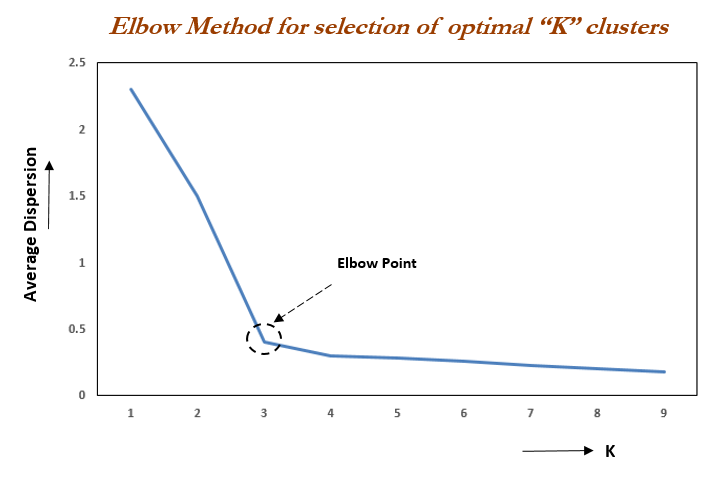

In [ ]:
# Training SOM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def som(X, lrate, b, max_epoch, n_cluster):
    centroids = np.random.uniform(size=(n_cluster, len(X[0])))
    epoch = 0
    labels = []
    while epoch < max_epoch:
        for x in X:
            d = [sum((w - x) ** 2) for w in centroids]
            min_index = np.argmin(d)
            centroids[min_index] += lrate * (x - centroids[min_index])
        lrate *= b
        epoch += 1

    for x in X:
        d = [sum((w - x) ** 2) for w in centroids]
        min_index = np.argmin(d)
        labels.append(min_index)
    return centroids, labels

def draw(X, target, centroids):
    colors = 'rgbcmyk'
    for x, label in zip(X, target):
        plt.plot(x[0], x[1], colors[label] + '.')
    plt.plot(centroids[:, 0], centroids[:, 1], 'kx')


In [ ]:
# Fungsi Elbow Method

def elbow_method(X, max_cluster):
    distortions = []
    for num_cluster in range(1, max_cluster + 1):
        centroids, labels = som(X, lrate=0.1, b=0.5, max_epoch=100, n_cluster=num_cluster)
        distortions.append(sum([np.linalg.norm(x - centroids[labels[i]]) ** 2 for i, x in enumerate(X)]))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_cluster + 1), distortions, 'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for SOM')
    plt.show()

    elbow = np.diff(distortions, 2)
    best_k = -1
    max_val = -float('inf')
    for i, val in enumerate(elbow):
        if val > max_val:
            max_val = val
            best_k = i + 2

    return best_k

In [ ]:
# Hanya gunakan kolom A1 - A14 dan drop kolom CustomerID dan Class
file_path = 'Data SOM.csv'
data = pd.read_csv(file_path)
X = data[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14']]

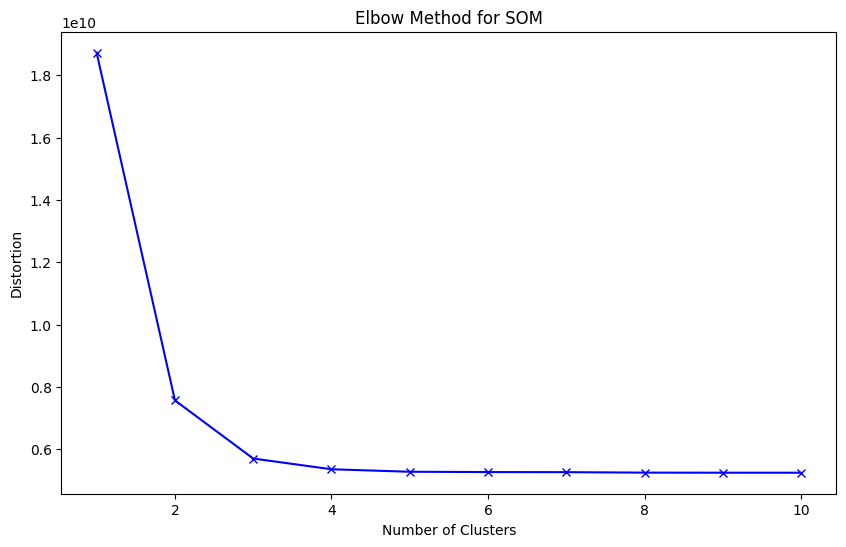

Jumlah cluster optimal: 2


In [ ]:
# Tentukan jumlah cluster optimal dengan memanggil fungsi Elbow Method
best_k = elbow_method(X.values, max_cluster=10)
print('Jumlah cluster optimal:', best_k)

Silhouette score: 0.9418688057776996


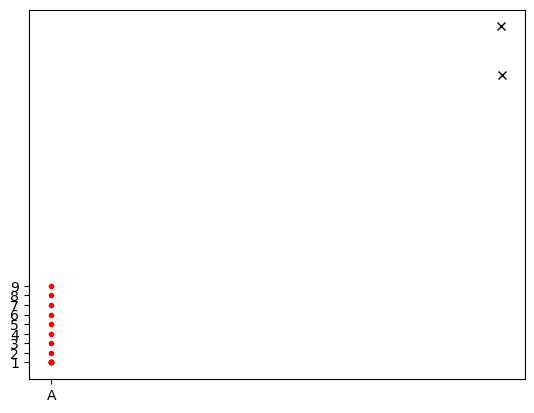

In [ ]:
# Lakukan pelatihan dan pengujian data dengan memanggil fungsi SOM dan parameter cluster yang digunakan adalah best_k
# Lakukan tuning parameter untuk menghasilkan nilai silhouette yang paling optimal

from sklearn.metrics import silhouette_score

X = data[X.columns]
centroids, labels = som(X.values, lrate=.05, b=.5, max_epoch=3, n_cluster=best_k)

# Hitung Silhouette score
silhouette = silhouette_score(X, labels)
print('Silhouette score:', silhouette)
draw(X, labels, centroids)

# Analisis

1. Jelaskan konsep Elbow Method di SOM!
2. Berapa jumlah cluster paling optimal yang dihasilkan melalui Elbow Method?
3. Jelaskan pengaruh lrate, b, max_epoch, dan n_cluster pada tuning parameter yang anda lakukan!

Jawab disini

1. Elbow Method adalah metode yang digunakan untuk menentukan jumlah cluster optimal dalam clustering. Metode ini didasarkan pada prinsip bahwa semakin banyak cluster yang digunakan, maka nilai inertia (jumlah kuadrat jarak antar titik data dengan centroidnya) akan semakin menurun. Namun, penurunan nilai inertia akan semakin kecil setelah jumlah cluster mencapai nilai optimal.
  Pada SOM, Elbow Method dapat diterapkan dengan cara menghitung nilai inertia untuk berbagai jumlah cluster. Kemudian, plot nilai inertia tersebut terhadap jumlah cluster. Nilai inertia yang menunjukkan perubahan yang signifikan dari nilai inertia sebelumnya menunjukkan jumlah cluster optimal.
2. Jumlah cluster paling optimal yang dihasilkan yaitu 2
3. - lrate adalah learning rate, yaitu kecepatan pembelajaran SOM. Nilai lrate yang lebih tinggi akan menyebabkan SOM belajar lebih cepat, tetapi dapat menyebabkan SOM overfitting. Nilai lrate yang lebih rendah akan menyebabkan SOM belajar lebih lambat, tetapi dapat menyebabkan SOM underfitting.

  - b adalah momentum, yaitu bobot yang diberikan pada perubahan bobot vektor prototipe di iterasi sebelumnya. Nilai b yang lebih tinggi akan menyebabkan SOM lebih stabil, tetapi dapat menyebabkan SOM belajar lebih lambat. Nilai b yang lebih rendah akan menyebabkan SOM lebih fleksibel, tetapi dapat menyebabkan SOM overfitting.

  - max_epoch adalah jumlah iterasi maksimum yang akan dilakukan SOM. Nilai max_epoch yang lebih tinggi akan menyebabkan SOM belajar lebih teliti, tetapi dapat menyebabkan SOM overfitting. Nilai max_epoch yang lebih rendah akan menyebabkan SOM belajar lebih cepat, tetapi dapat menyebabkan SOM underfitting.

  - n_cluster adalah jumlah cluster yang akan dibuat oleh SOM. Nilai n_cluster yang lebih tinggi akan menyebabkan SOM lebih baik dalam membedakan antar kelas, tetapi dapat menyebabkan SOM overfitting. Nilai n_cluster yang lebih rendah akan menyebabkan SOM kurang baik dalam membedakan antar kelas, tetapi dapat mencegah SOM overfitting.